---
The objective here is to identify where a vehicle's license plate is and then recognize the Digits and Letters on it.
---
---

# Imports

In [2]:
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.3 MB/s 
     |████████████████████████████████| 619 kB 48.4 MB/s 
     |████████████████████████████████| 145 kB 62.2 MB/s 
     |████████████████████████████████| 47.6 MB 1.9 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Library to text detection from images
import easyocr
# Library to help with contours of the image
import imutils
# Library to detect objects (detect where the plate is)
import cv2

import numpy as np
import matplotlib.pyplot as plt

# 1. Read in Image, Grayscale and Blur

In [97]:
def stage1( image ):
  '''Function to read, grayscale and show image'''
  
  # Read image

  # Img Google Drive path
  pkg_dir = "/content/drive/MyDrive/Estudos/OpenCV, SSD & GANs/Plate Recognition/imgs-test-01"
  img = cv2.imread( f'{pkg_dir}/{image}' )

  # Gray scaling

  # convert blue, green, red into gray
  gray = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY ) 

  # Show image

  imgshow = plt.imshow( cv2.cvtColor( gray, cv2.COLOR_BGR2RGB ))

  # Returns

  return img, gray, imgshow

# 2. Apply filter and find edges for localization

In [110]:
def stage2( image ):
  '''function to reduce noise in image, detect edges and show filtered image'''

  gray = stage1( image )[1]

  # Noise reduction
  
  bfilter = cv2.bilateralFilter( gray, 11, 17, 17 ) # the arguments show how intense we want the noise reduction

  # Edge detection with Canny algorithm

  edged = cv2.Canny( bfilter, 30, 200 )

  # Image filtered show

  imgshow = plt.imshow( cv2.cvtColor( edged, cv2.COLOR_BGR2RGB ) )

  return edged, imgshow

# 3. Find Contours and Apply Mask

## img1

In [52]:
# Finding the edge with a approximate contour
keypoints = cv2.findContours( edged1.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE )

# Simplifying how a contour looks like
contours1 = imutils.grab_contours( keypoints )

# Returning the top 10 contours
contours1 = sorted( contours1, key = cv2.contourArea, reverse = True )[:10]

In [53]:
# Finding the location of the plate
location1 = None

for contour in contours1:
  approx1 = cv2.approxPolyDP( contour, 10, True )
  if len(approx1) == 4:
    location1 = approx1
    break

In [54]:
# 4 edges of the plate
location1

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [55]:
# Applying a mask to isolate the area of the plate from the rest of the image

# Black mask with the same shape as the original gray image
mask = np.zeros( gray1.shape, np.uint8 )

# Returning a location from the mask
new_image1 = cv2.drawContours( mask, [location1], 0, 255, -1 )

# Overlay the mask over the original image
new_image1 = cv2.bitwise_and( img1, img1, mask = mask )

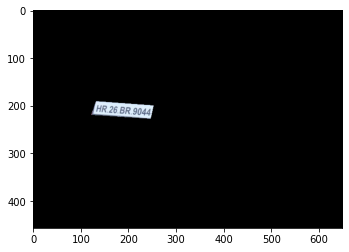

In [56]:
plt.imshow( cv2.cvtColor( new_image1, cv2.COLOR_BGR2RGB ) )

In [59]:
# Isolating the section with the plate only
( x, y ) = np.where( mask == 255 )

( x1, y1 ) = ( np.min(x), np.min(y) )

( x2, y2 ) = ( np.max(x), np.max(y) )

cropped_image1 = gray1[ x1: x2+1, y1: y2+1]

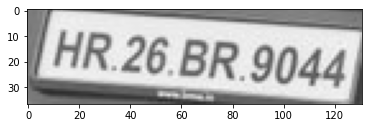

In [60]:
plt.imshow( cv2.cvtColor( cropped_image1, cv2.COLOR_BGR2RGB ) )

# 4. Use Easy OCR to read text

## img1

In [63]:
reader1 = easyocr.Reader(['en'])
result1 = reader1.readtext( cropped_image1 )
result1

[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.572802443929149)]

# 5. Render result

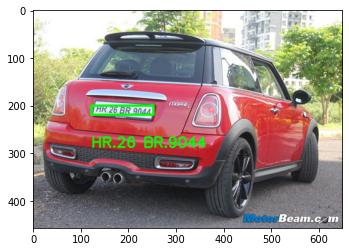

In [67]:
text1 = result1[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res1 = cv2.putText( img1, text = text1, org = ( approx1[0][0][0], approx1[1][0][1]+60 ),
                    fontFace = font, fontScale = 1, color = (0, 255, 0),
                    thickness = 2, lineType = cv2.LINE_AA )
res1 = cv2.rectangle( img1, tuple( approx1[0][0]), tuple(approx1[2][0] ), (0,255,0), 3 )

plt.imshow( cv2.cvtColor( res1, cv2.COLOR_BGR2RGB ) )

# Test-images

## img1

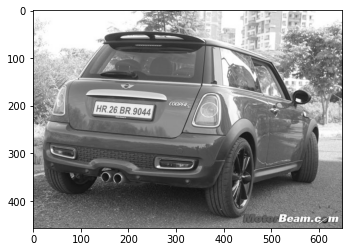

In [98]:
stage1( 'image1.jpg' )[2]

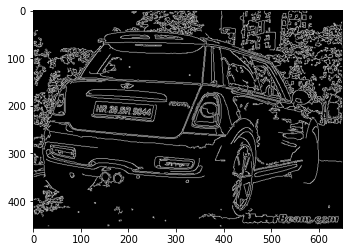

In [111]:
stage2( 'image1.jpg' )[1]

## img2

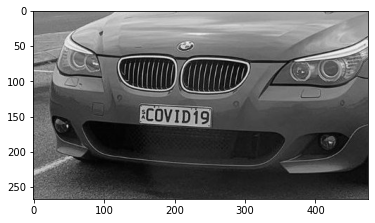

In [99]:
stage1( 'image2.jpg' )[2]

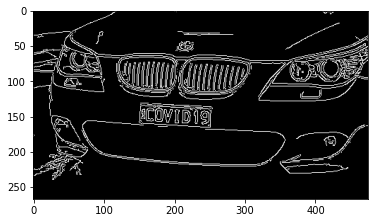

In [112]:
stage2( 'image2.jpg' )[1]

## img3

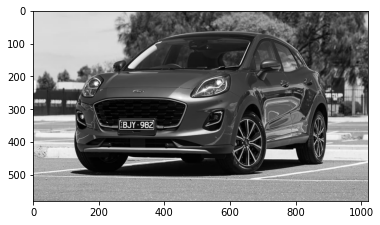

In [100]:
stage1( 'image3.jpg' )[2]

In [ ]:
stage2( 'image3.jpg' )[1]

## img4

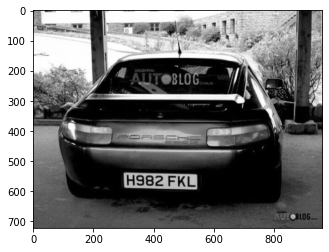

In [101]:
stage1( 'image4.jpg' )[2]

In [ ]:
stage2( 'image4.jpg' )[1]

## img5

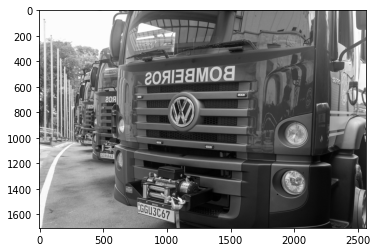

In [102]:
stage1( 'image5.jpg' )[2]

In [ ]:
stage2( 'image5.jpg' )[1]

## img6

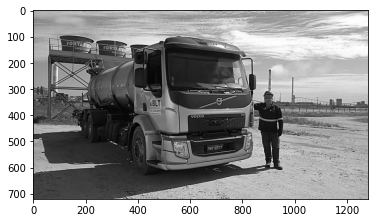

In [103]:
stage1( 'image6.jpg' )[2]

In [ ]:
stage2( 'image6.jpg' )[1]

## img7

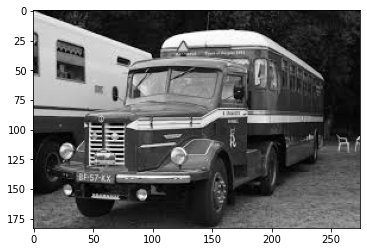

In [104]:
stage1( 'image7.jpg' )[2]

In [ ]:
stage2( 'image7.jpg' )[1]

## img8

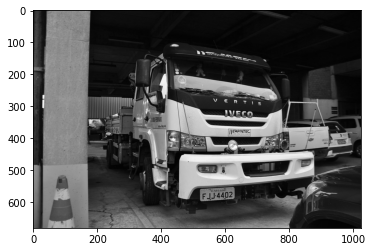

In [105]:
stage1( 'image8.jpg' )[2]

In [ ]:
stage2( 'image8.jpg' )[1]

## img9

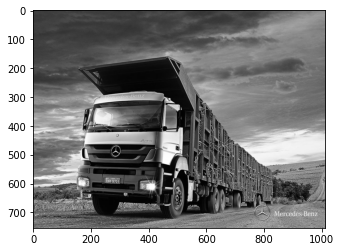

In [106]:
stage1( 'image9.jpg' )[2]

In [ ]:
stage2( 'image9.jpg' )[1]